<a href="https://colab.research.google.com/github/DivyaDeepthi123/PyTorch-Testing/blob/main/PyTorch_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
tensor2=torch.tensor([[[1,2,3],[4,5,6],[7,8,9]],[[1,2,3],[4,5,6],[7,8,9]]])
print(tensor2.dim())
tensor3=torch.randint(0,9,(2,3,3))
print(tensor3.dim())
print(tensor3)
tensor4=torch.cat((tensor2, tensor3),dim=1)
tensor4.dim()

3
3
tensor([[[1, 0, 8],
         [6, 5, 5],
         [5, 2, 1]],

        [[2, 7, 8],
         [7, 6, 4],
         [2, 1, 6]]])


3

In [ ]:
t1=torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
t2=torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
t1.sum(dim=0)

tensor([12, 15, 18])

In [ ]:
x=torch.linspace(0.0,1.0,15).reshape(15,1)
w=torch.tensor([5])
b=torch.tensor([3])
y=w*x+b
x

tensor([[0.0000],
        [0.0714],
        [0.1429],
        [0.2143],
        [0.2857],
        [0.3571],
        [0.4286],
        [0.5000],
        [0.5714],
        [0.6429],
        [0.7143],
        [0.7857],
        [0.8571],
        [0.9286],
        [1.0000]])

Gradient Descent

In [ ]:
w=torch.randn(size=(1,1),requires_grad=True)
b=torch.randn(size=(1,1),requires_grad=True)
def forward(x):
  return w*x+b
def loss(y,y_hat):
  return ((y_hat-y)**2).mean() #mse
print(w,b)

tensor([[0.1936]], requires_grad=True) tensor([[1.5157]], requires_grad=True)


In [ ]:
le=0.03
ne=200
print(w,b)
for epoch in range(ne):
  y_hat=forward(x)
  print(y_hat)
  l=loss(y,y_hat)
  print(l)
  l.backward()
  with torch.no_grad():
    w-=le*w.grad
    b-=le*b.grad
  w.grad.zero_()
  b.grad.zero_()
print(w,b)

tensor([[4.1232]], requires_grad=True) tensor([[3.4740]], requires_grad=True)
tensor([[3.4740],
        [3.7685],
        [4.0630],
        [4.3575],
        [4.6520],
        [4.9465],
        [5.2410],
        [5.5355],
        [5.8300],
        [6.1246],
        [6.4191],
        [6.7136],
        [7.0081],
        [7.3026],
        [7.5971]], grad_fn=<AddBackward0>)
tensor(0.0745, grad_fn=<MeanBackward0>)
tensor([[3.4718],
        [3.7666],
        [4.0614],
        [4.3562],
        [4.6510],
        [4.9458],
        [5.2406],
        [5.5354],
        [5.8302],
        [6.1250],
        [6.4198],
        [6.7145],
        [7.0093],
        [7.3041],
        [7.5989]], grad_fn=<AddBackward0>)
tensor(0.0738, grad_fn=<MeanBackward0>)
tensor([[3.4697],
        [3.7648],
        [4.0598],
        [4.3549],
        [4.6500],
        [4.9451],
        [5.2401],
        [5.5352],
        [5.8303],
        [6.1254],
        [6.4204],
        [6.7155],
        [7.0106],
        [7.3057],


In [ ]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms


In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
print(dir(datasets))

['CIFAR10', 'CIFAR100', 'CLEVRClassification', 'CREStereo', 'Caltech101', 'Caltech256', 'CarlaStereo', 'CelebA', 'Cityscapes', 'CocoCaptions', 'CocoDetection', 'Country211', 'DTD', 'DatasetFolder', 'EMNIST', 'ETH3DStereo', 'EuroSAT', 'FER2013', 'FGVCAircraft', 'FakeData', 'FallingThingsStereo', 'FashionMNIST', 'Flickr30k', 'Flickr8k', 'Flowers102', 'FlyingChairs', 'FlyingThings3D', 'Food101', 'GTSRB', 'HD1K', 'HMDB51', 'INaturalist', 'ImageFolder', 'ImageNet', 'Imagenette', 'InStereo2k', 'KMNIST', 'Kinetics', 'Kitti', 'Kitti2012Stereo', 'Kitti2015Stereo', 'KittiFlow', 'LFWPairs', 'LFWPeople', 'LSUN', 'LSUNClass', 'MNIST', 'Middlebury2014Stereo', 'MovingMNIST', 'Omniglot', 'OxfordIIITPet', 'PCAM', 'PhotoTour', 'Places365', 'QMNIST', 'RenderedSST2', 'SBDataset', 'SBU', 'SEMEION', 'STL10', 'SUN397', 'SVHN', 'SceneFlowStereo', 'Sintel', 'SintelStereo', 'StanfordCars', 'UCF101', 'USPS', 'VOCDetection', 'VOCSegmentation', 'VisionDataset', 'WIDERFace', '__all__', '__builtins__', '__cached__',

In [ ]:
hidden_size=400
ne=8
batch_size=32
lr=0.0001

In [ ]:
train_data=datasets.MNIST(root="./data",train=True,download=True, transform=transforms.ToTensor())
test_data=datasets.MNIST(root="./data",train=False,download=True,transform=transforms.ToTensor())

In [ ]:
train_data.classes
train_data.data.shape
train_data.targets.shape
test_data.data.shape

torch.Size([10000, 28, 28])

In [ ]:
in_features=784
out_features=10

In [ ]:
train_dataloader=torch.utils.data.DataLoader(train_data,batch_size=batch_size,shuffle=True)
test_dataloader=torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=False)

In [ ]:
print(train_dataloader.dataset.targets[0])

tensor(5)


torch.Size([32, 1, 28, 28])
torch.Size([32])


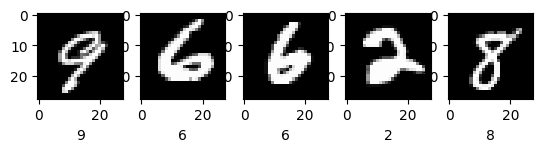

In [ ]:
import matplotlib.pyplot as plt
data=iter(train_dataloader)
imgs,lbls=next(data)
print(imgs.shape)
print(lbls.shape)
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(imgs[i][0],cmap="gray")
  plt.xlabel(lbls[i].item())
plt.show()

In [ ]:
class BasicNeuralNet(nn.Module):
  def __init__(self,hidden_size):
    super(BasicNeuralNet,self).__init__()
    self.hidden_size=hidden_size
    self.layer1=nn.Linear(in_features,self.hidden_size)
    self.layer2=nn.Linear(self.hidden_size,out_features)
  def forward(self,  x):
    out=self.layer1(x)
    out=torch.relu(out)
    out=self.layer2(out)
    return out
model=BasicNeuralNet(hidden_size).to(device)

In [ ]:
w1,b1,w2,b2=list(model.parameters())
print(w1.shape)
print(b1.shape)
print(w2.shape)
print(b2.shape)

torch.Size([400, 784])
torch.Size([400])
torch.Size([10, 400])
torch.Size([10])


In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=lr)


In [ ]:
total_steps=len(train_dataloader)
for epoch in range(ne):
  for i,(images,labels) in enumerate(train_dataloader):
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    outputs=model(images)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()#parameter update
    optimizer.zero_grad()